In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-forecasting-week-5/submission.csv
/kaggle/input/covid19-global-forecasting-week-5/test.csv
/kaggle/input/covid19-global-forecasting-week-5/train.csv


In [2]:
training_data=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/train.csv")
test_data=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/test.csv")

In [3]:
training_data.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754934 entries, 0 to 754933
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              754934 non-null  int64  
 1   County          685174 non-null  object 
 2   Province_State  714168 non-null  object 
 3   Country_Region  754934 non-null  object 
 4   Population      754934 non-null  int64  
 5   Weight          754934 non-null  float64
 6   Date            754934 non-null  object 
 7   Target          754934 non-null  object 
 8   TargetValue     754934 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 51.8+ MB


In [5]:
training_data.isnull().sum()

Id                    0
County            69760
Province_State    40766
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [6]:
training_data["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311670 entries, 0 to 311669
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ForecastId      311670 non-null  int64  
 1   County          282870 non-null  object 
 2   Province_State  294840 non-null  object 
 3   Country_Region  311670 non-null  object 
 4   Population      311670 non-null  int64  
 5   Weight          311670 non-null  float64
 6   Date            311670 non-null  object 
 7   Target          311670 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.0+ MB


In [8]:
test_data.isnull().sum()

ForecastId            0
County            28800
Province_State    16830
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
dtype: int64

In [9]:
training_data.drop(["Province_State","County","Id"],axis=1,inplace=True)
training_data.head()

,Country_Region,Population,Weight,Date,Target,TargetValue
0,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [10]:
test_data.drop(["Province_State","County","ForecastId"],axis=1,inplace=True)
test_data.head()

,Country_Region,Population,Weight,Date,Target
0,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


In [11]:
training_data.isnull().sum()

Country_Region    0
Population        0
Weight            0
Date              0
Target            0
TargetValue       0
dtype: int64

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754934 entries, 0 to 754933
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country_Region  754934 non-null  object 
 1   Population      754934 non-null  int64  
 2   Weight          754934 non-null  float64
 3   Date            754934 non-null  object 
 4   Target          754934 non-null  object 
 5   TargetValue     754934 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 34.6+ MB


In [13]:
training_data.describe()

,Population,Weight,TargetValue
count,7.549340e+05,754934.000000,754934.000000
mean,2.719395e+06,0.530872,9.746414
std,3.477762e+07,0.451909,261.845643
min,8.600000e+01,0.047491,-10034.000000
25%,1.213300e+04,0.096838,0.000000
50%,3.053100e+04,0.349413,0.000000
75%,1.056120e+05,0.968379,0.000000
max,1.395773e+09,2.239186,36163.000000


In [14]:
training_data["Target"].value_counts()

ConfirmedCases    377467
Fatalities        377467
Name: Target, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2039b80910>,
      dtype=object)

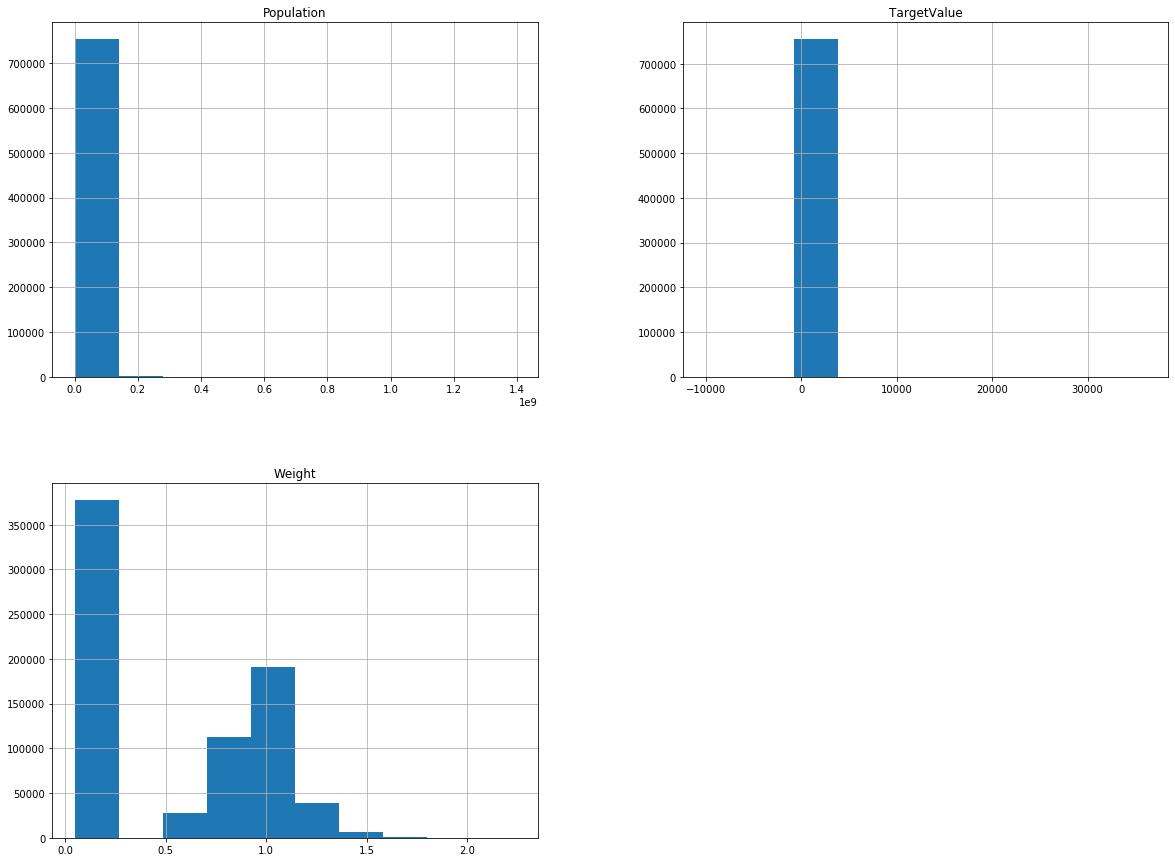

In [16]:
training_data.hist(figsize=(20,15))

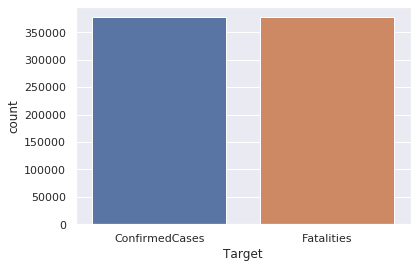

In [17]:
sns.set(style="darkgrid")
sns.countplot(x="Target",data=training_data)

([<matplotlib.patches.Wedge at 0x7f203294ad50>,
 [Text(-1.0797221394259726, 0.2102382021265413, 'ConfirmedCases'),
  Text(1.079722149267932, -0.2102381515811, 'Fatalities')],
 [Text(-0.5889393487778032, 0.11467538297811342, '93.9%'),
  Text(0.5889393541461447, -0.11467535540787271, '6.1%')])

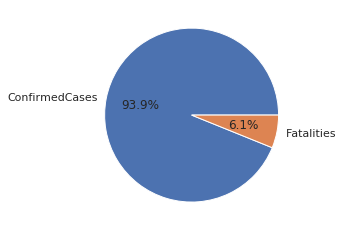

In [18]:
plt.pie(x=training_data.groupby(by=["Target"])["TargetValue"].sum(),labels=training_data["Target"].unique(),autopct='%1.1f%%')


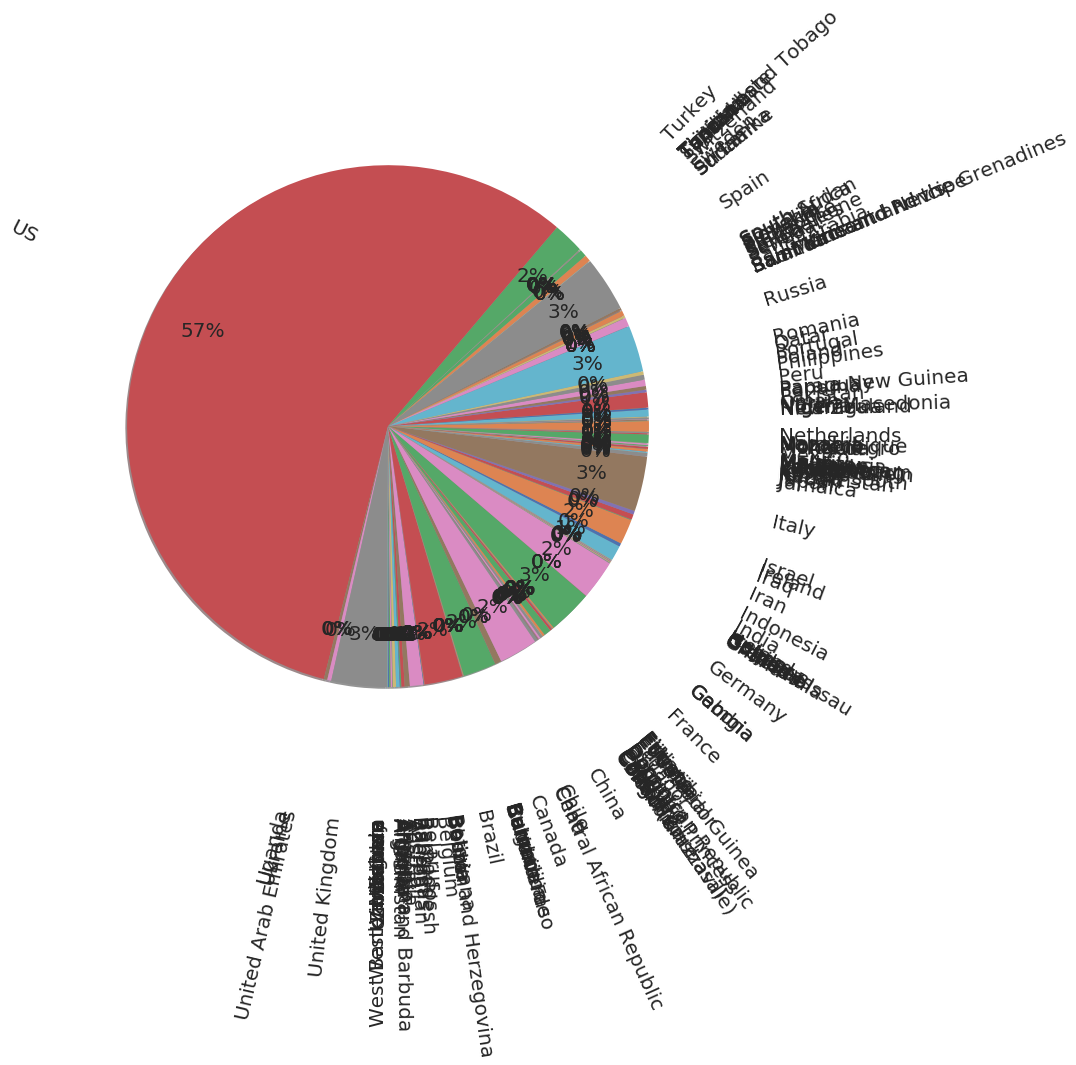

In [19]:

plt.pie(x=training_data.groupby(by=["Country_Region"])["TargetValue"].sum(),labels=training_data["Country_Region"].unique(),autopct='%.0f%%',
           radius=3.0,wedgeprops = {'linewidth': 0.0,"edgecolor":"k"},pctdistance=0.8,labeldistance=1.5,textprops={"fontsize":20},shadow=True,
           startangle=-90,rotatelabels=True)
plt.show()

In [20]:
last_date=training_data.Date.max()
df=training_data[training_data["Date"]==last_date]
df

,Country_Region,Population,Weight,Date,Target,TargetValue
216,Afghanistan,27657145,0.058359,2020-05-10,ConfirmedCases,369.0
217,Afghanistan,27657145,0.583587,2020-05-10,Fatalities,5.0
434,Albania,2886026,0.067225,2020-05-10,ConfirmedCases,12.0
435,Albania,2886026,0.672251,2020-05-10,Fatalities,0.0
652,Algeria,40400000,0.057096,2020-05-10,ConfirmedCases,165.0
...,...,...,...,...,...,...
754497,Yemen,28500000,0.582567,2020-05-10,Fatalities,1.0
754714,Zambia,15933883,0.060299,2020-05-10,ConfirmedCases,15.0
754715,Zambia,15933883,0.602992,2020-05-10,Fatalities,0.0
754932,Zimbabwe,14240168,0.060711,2020-05-10,ConfirmedCases,1.0


In [21]:
df=df.groupby(by=["Country_Region"],as_index=False)["TargetValue"].sum()
df

,Country_Region,TargetValue
0,Afghanistan,374.0
1,Albania,12.0
2,Algeria,173.0
3,Andorra,1.0
4,Angola,2.0
...,...,...
182,West Bank and Gaza,0.0
183,Western Sahara,0.0
184,Yemen,18.0
185,Zambia,15.0


In [22]:
countries=df.nlargest(5,"TargetValue")
countries


,Country_Region,TargetValue
173,US,60544.0
139,Russia,11100.0
23,Brazil,7105.0
79,India,4464.0
177,United Kingdom,4192.0


In [23]:
cases=training_data.groupby(by=["Date","Country_Region"],as_index=False)["TargetValue"].sum()
cases

,Date,Country_Region,TargetValue
0,2020-01-23,Afghanistan,0.0
1,2020-01-23,Albania,0.0
2,2020-01-23,Algeria,0.0
3,2020-01-23,Andorra,0.0
4,2020-01-23,Angola,0.0
...,...,...,...
20378,2020-05-10,West Bank and Gaza,0.0
20379,2020-05-10,Western Sahara,0.0
20380,2020-05-10,Yemen,18.0
20381,2020-05-10,Zambia,15.0


In [24]:
cases=cases.merge(countries,on="Country_Region")
cases

,Date,Country_Region,TargetValue_x,TargetValue_y
0,2020-01-23,Brazil,0.0,7105.0
1,2020-01-24,Brazil,0.0,7105.0
2,2020-01-25,Brazil,0.0,7105.0
3,2020-01-26,Brazil,0.0,7105.0
4,2020-01-27,Brazil,0.0,7105.0
...,...,...,...,...
540,2020-05-06,United Kingdom,6765.0,4192.0
541,2020-05-07,United Kingdom,6157.0,4192.0
542,2020-05-08,United Kingdom,5279.0,4192.0
543,2020-05-09,United Kingdom,4242.0,4192.0


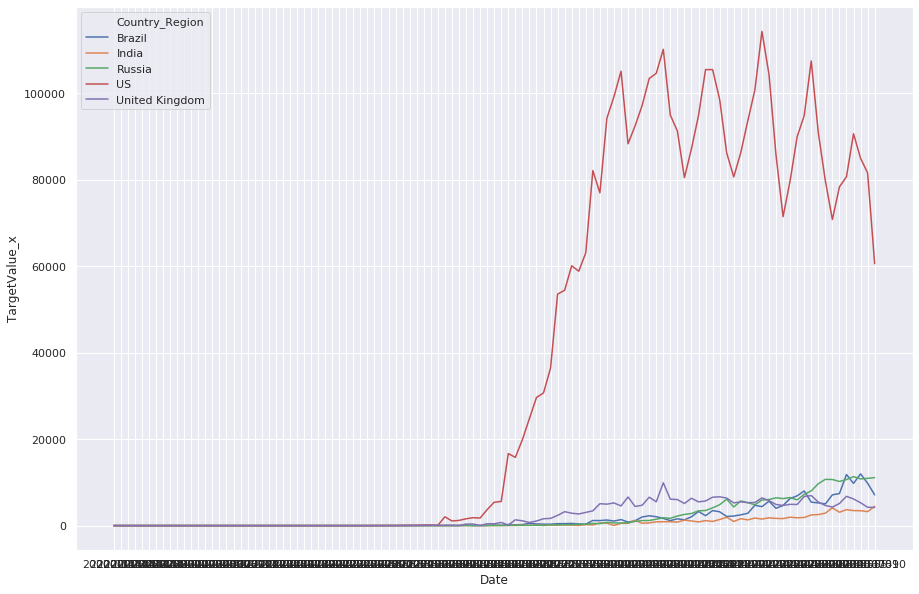

In [25]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.lineplot(x="Date",y="TargetValue_x",hue="Country_Region",data=cases)

In [26]:
training_data.corr()

,Population,Weight,TargetValue
Population,1.000000,-0.039869,0.127156
Weight,-0.039869,1.000000,-0.036102
TargetValue,0.127156,-0.036102,1.000000


In [27]:
training_data.drop(["Target"],inplace=True,axis=1)
test_data.drop(["Target"],inplace=True,axis=1)
training_data

,Country_Region,Population,Weight,Date,TargetValue
0,Afghanistan,27657145,0.058359,2020-01-23,0.0
1,Afghanistan,27657145,0.583587,2020-01-23,0.0
2,Afghanistan,27657145,0.058359,2020-01-24,0.0
3,Afghanistan,27657145,0.583587,2020-01-24,0.0
4,Afghanistan,27657145,0.058359,2020-01-25,0.0
...,...,...,...,...,...
754929,Zimbabwe,14240168,0.607106,2020-05-08,0.0
754930,Zimbabwe,14240168,0.060711,2020-05-09,1.0
754931,Zimbabwe,14240168,0.607106,2020-05-09,0.0
754932,Zimbabwe,14240168,0.060711,2020-05-10,1.0


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
training_data["Country_Region"]=le.fit_transform(training_data["Country_Region"])

In [30]:
training_data.head()

,Country_Region,Population,Weight,Date,TargetValue
0,0,27657145,0.058359,2020-01-23,0.0
1,0,27657145,0.583587,2020-01-23,0.0
2,0,27657145,0.058359,2020-01-24,0.0
3,0,27657145,0.583587,2020-01-24,0.0
4,0,27657145,0.058359,2020-01-25,0.0


In [31]:
test_data["Country_Region"]=le.fit_transform(test_data["Country_Region"])

In [32]:
test_data.head()

,Country_Region,Population,Weight,Date
0,0,27657145,0.058359,2020-04-27
1,0,27657145,0.583587,2020-04-27
2,0,27657145,0.058359,2020-04-28
3,0,27657145,0.583587,2020-04-28
4,0,27657145,0.058359,2020-04-29


In [33]:
training_data.Date=training_data.Date.apply(lambda x:x.split("-"))


In [34]:
test_data.Date=test_data.Date.apply(lambda x:x.split("-"))

In [35]:
def month_day(dataset):
    month=[]
    day=[]
    for i in dataset.Date:
        month.append(int(i[1]))
        day.append(int(i[2]))
    dataset["month"]=month
    dataset["day"]=day
    dataset=dataset.drop(["Date"],axis=1)
    return dataset

In [36]:
training_data=month_day(training_data)
test_data=month_day(test_data)
training_data.head()

,Country_Region,Population,Weight,TargetValue,month,day
0,0,27657145,0.058359,0.0,1,23
1,0,27657145,0.583587,0.0,1,23
2,0,27657145,0.058359,0.0,1,24
3,0,27657145,0.583587,0.0,1,24
4,0,27657145,0.058359,0.0,1,25


In [37]:
test_data.head()

,Country_Region,Population,Weight,month,day
0,0,27657145,0.058359,4,27
1,0,27657145,0.583587,4,27
2,0,27657145,0.058359,4,28
3,0,27657145,0.583587,4,28
4,0,27657145,0.058359,4,29


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [39]:
y=training_data["TargetValue"].values

In [40]:
training_data.drop(["TargetValue"],axis=1,inplace=True)
training_data.head()

,Country_Region,Population,Weight,month,day
0,0,27657145,0.058359,1,23
1,0,27657145,0.583587,1,23
2,0,27657145,0.058359,1,24
3,0,27657145,0.583587,1,24
4,0,27657145,0.058359,1,25


In [41]:
x=scaler.fit_transform(training_data)
x

array([[0.        , 0.01981486, 0.00495869, 0.        , 0.73333333],
       [0.        , 0.01981486, 0.24460359, 0.        , 0.73333333],
       [0.        , 0.01981486, 0.00495869, 0.        , 0.76666667],
       ...,
       [1.        , 0.01020229, 0.25533457, 1.        , 0.26666667],
       [1.        , 0.01020229, 0.00603179, 1.        , 0.3       ],
       [1.        , 0.01020229, 0.25533457, 1.        , 0.3       ]])

In [42]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [43]:
from sklearn.model_selection import cross_val_score
performance=cross_val_score(xgb,x,y,cv=10,scoring="neg_mean_absolute_error",n_jobs=-1)
mae=-performance

In [44]:
mae

array([261.20538402,   7.00642977,   2.49260687,   1.06082611,
         4.61273501,   4.79770275,  10.77496316,   2.97941553,
         1.97564523,  32.99181553])

In [45]:
mae.mean()

32.98975239845348

In [46]:
test_data=scaler.transform(test_data)
test_data

array([[0.        , 0.01981486, 0.00495869, 0.75      , 0.86666667],
       [0.        , 0.01981486, 0.24460359, 0.75      , 0.86666667],
       [0.        , 0.01981486, 0.00495869, 0.75      , 0.9       ],
       ...,
       [1.        , 0.01020229, 0.25533457, 1.25      , 0.26666667],
       [1.        , 0.01020229, 0.00603179, 1.25      , 0.3       ],
       [1.        , 0.01020229, 0.25533457, 1.25      , 0.3       ]])

In [47]:
xgb.fit(x,y)
prediction_xgb=xgb.predict(test_data)
prediction_xgb=np.around(prediction_xgb)
prediction_xgb

array([104.,   2., 107., ...,  -1., -46., -31.], dtype=float32)

In [48]:
xgb_1500=XGBRegressor(n_estimators=1500,max_depth=15)

In [49]:
xgb_1500.fit(x,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [50]:
prediction=xgb_1500.predict(test_data)

In [51]:
prediction=np.around(prediction)
prediction

array([172.,   7., 125., ...,  -0.,   1.,  -0.], dtype=float32)

In [52]:
submission=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/submission.csv")
submission.head()

,ForecastId_Quantile,TargetValue
0,1_0.05,1
1,1_0.5,1
2,1_0.95,1
3,2_0.05,1
4,2_0.5,1


In [53]:
test_copy=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-5/test.csv')

In [54]:
output = pd.DataFrame({'Id': test_copy.ForecastId  , 'TargetValue': prediction})
output.head()


,Id,TargetValue
0,1,172.0
1,2,7.0
2,3,125.0
3,4,1.0
4,5,111.0


In [55]:
a=output.groupby(['Id'])['TargetValue'].quantile(q=0.05).reset_index()
b=output.groupby(['Id'])['TargetValue'].quantile(q=0.5).reset_index()
c=output.groupby(['Id'])['TargetValue'].quantile(q=0.95).reset_index()

In [56]:
a.columns=['Id','q0.05']
b.columns=['Id','q0.5']
c.columns=['Id','q0.95']
a=pd.concat([a,b['q0.5'],c['q0.95']],1)
a['q0.05']=a['q0.05']
a['q0.5']=a['q0.5']
a['q0.95']=a['q0.95']

In [57]:
sub=pd.melt(a, id_vars=['Id'], value_vars=['q0.05','q0.5','q0.95'])
sub['variable']=sub['variable'].str.replace("q","", regex=False)
sub['ForecastId_Quantile']=sub['Id'].astype(str)+'_'+sub['variable']
sub['TargetValue']=sub['value']
sub=sub[['ForecastId_Quantile','TargetValue']]
sub.reset_index(drop=True,inplace=True)
sub.to_csv("submission.csv",index=False)
sub.head()

,ForecastId_Quantile,TargetValue
0,1_0.05,172.0
1,2_0.05,7.0
2,3_0.05,125.0
3,4_0.05,1.0
4,5_0.05,111.0


In [58]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935010 entries, 0 to 935009
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ForecastId_Quantile  935010 non-null  object 
 1   TargetValue          935010 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.3+ MB
